In [1]:
import os
from glob import glob
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [9]:
import numpy as np

def dice_score(binary_array1, binary_array2):
    """
    Calculate the Dice similarity coefficient (Dice score) for two binary arrays.

    Args:
    binary_array1 (numpy.ndarray): Binary array representing the first mask.
    binary_array2 (numpy.ndarray): Binary array representing the second mask.

    Returns:
    float: Dice score between the two binary arrays.
    """
    intersection = np.logical_and(binary_array1, binary_array2).sum()
    union = binary_array1.sum() + binary_array2.sum()
    
    if union == 0:
        return 1.0  # Handle case where both arrays are empty
    else:
        return 2.0 * intersection / union


dice score :  0.9805322372456219
dice score :  0.9651392977524224
dice score :  0.9895443410250245
dice score :  0.9507308550808048
dice score :  0.9179946076008768
avg dice :  0.96078826774095


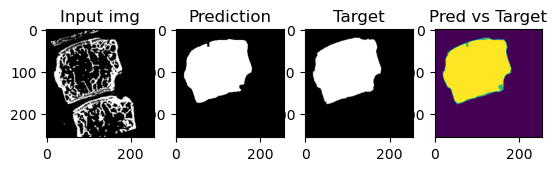

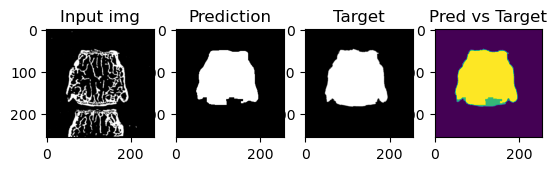

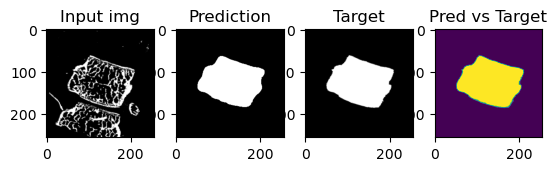

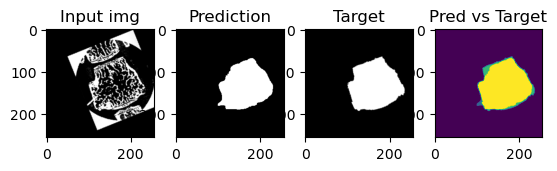

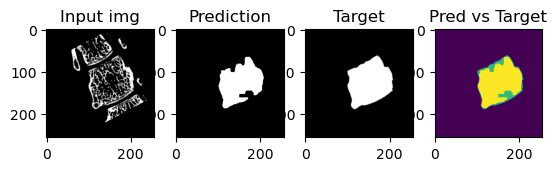

In [13]:
# visualize overlapped images
fileList = ['0.npy','1.npy', '2.npy', '3.npy', '4.npy']
diceList = []
numplots = 4
for filename in fileList:
    img = np.load('/home/yec23006/projects/research/KOMP/output/results_all/img/' + filename)
    mask = np.load('/home/yec23006/projects/research/KOMP/output/results_all/mask/' + filename)
    target = np.load('/home/yec23006/projects/research/KOMP/output/results_all/target/' + filename)

    plt.figure()
    plt.subplot(1, numplots, 1)
    plt.imshow(img, 'gray')
    plt.title('Input img')

    plt.subplot(1, numplots, 2)
    plt.imshow(mask, 'gray')
    plt.title('Prediction')

    plt.subplot(1, numplots, 3)
    plt.imshow(target, 'gray')
    plt.title('Target')

    plt.subplot(1,numplots,4)
    overlap = mask*1 + target*2
    plt.imshow(overlap)
    plt.title('Pred vs Target')

    dicescore = dice_score(mask, target)
    print('dice score : ', dicescore)
    diceList.append(dicescore)
print('avg dice : ', np.mean(diceList))

In [11]:
x = np.load('/home/yec23006/projects/research/KOMP/output/results_all/img/4.npy')

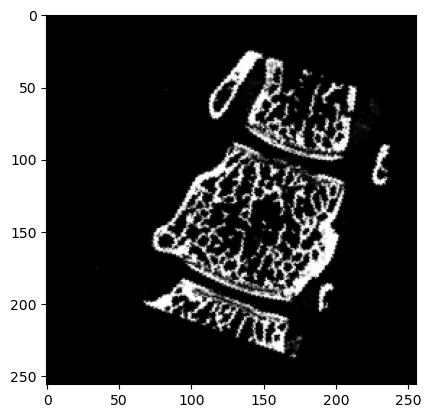

In [12]:
plt.imshow(x, 'gray')

In [3]:
path2data = '/home/yec23006/projects/research/KOMP/Vertebrae'
img_list = os.listdir(os.path.join(path2data, 'Original'))
processed_list = os.listdir(os.path.join(path2data, 'Processed'))
mask_list = os.listdir(os.path.join(path2data, 'Mask'))

In [6]:
len(img_list), len(processed_list), len(mask_list)

(45, 45, 47)

In [5]:
for i in mask_list:
    filename = i.split("_template")[0] + '.jpg'
    if filename not in img_list:
        print(i)

CCC_E11_hV_ML3_s3_2_shift3_template.jpg
CCC_E11_hV_ML2_s1_2_shift3_template.jpg


In [2]:
x = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,1,0,0,0],
    [0,1,1,0,1,1,0,0,1,1,0,0],
    [0,0,0,0,0,1,1,1,0,0,0,1]
])

print(x.shape)

(4, 12)


In [5]:
fig = plt.figure()
plt.imshow(x, 'gray')
fig.savefig('/home/yec23006/projects/research/KOMP/output/results_all/mask/test.png')
plt.close()

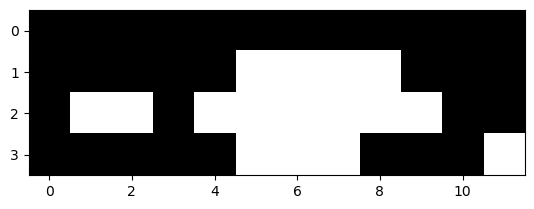

In [8]:
from scipy import ndimage
holeFilled = ndimage.binary_fill_holes(x).astype(int)
plt.imshow(holeFilled, 'gray')
plt.show()

# of objects :  3
3
[0 1 2 3]


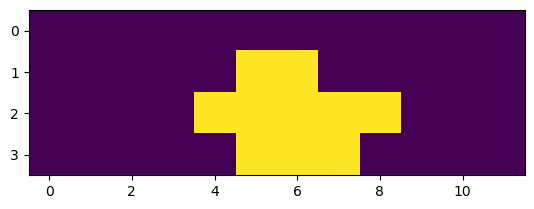

In [15]:
from skimage.measure import label, regionprops
from scipy import ndimage

labeled_mask, num_objects = ndimage.label(x.astype(np.uint8))
print("# of objects : ", num_objects)
print(np.max(labeled_mask))
print(np.unique(labeled_mask))


props = regionprops(labeled_mask)
largest_region_idx = np.argmax([prop.area for prop in props])
largest_region_mask = (labeled_mask == largest_region_idx + 1).astype(np.uint8)
plt.imshow(largest_region_mask)
plt.show()